In [1]:
import alias
import alias.injection as inj
import alias.continuum_normalization as cn
import alias.detection as detect

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
from astropy.io import fits

plt.rcParams.update({'font.size': 10})

%matplotlib inline

/mnt_home/jhand/alias/alias/injection.py:30: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdm


In [2]:
with open('../data/sample_star_urls', 'r') as f:
    urls = f.read().splitlines()

exclude = []

files = [ '../data/spectra/%s' %url.split('/')[-1] for url in urls if url not in exclude]

ds = alias.loadDataset(files)

/mnt_home/jhand/alias/alias/__init__.py:59: RuntimeWarning: divide by zero encountered in power
  spec_ivar_parts = np.array(hdul[2].data)**-2
/home/jhand/.conda/envs/dev/lib/python3.11/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,


In [3]:
norm_flux, norm_ivar, _ = cn.continuum_normalize(ds.flux, ds.ivar)
residuals = norm_flux - np.nanmedian(norm_flux, axis=0)

In [96]:
import pandas as pd

candidates = pd.read_csv('candidates.csv').values

print(len(candidates))

254


In [11]:
# Divide into categories

categories = [ candidates[candidates[:,5] == n] for n in range(1,6) ]
categories

[array([[5.00000000e+00, 2.00000000e+01, 1.53622561e+04, 7.35806651e-02,
         3.11653995e+00, 1.00000000e+00],
        [6.00000000e+00, 2.00000000e+01, 1.53626806e+04, 7.01294251e-02,
         3.68156773e+00, 1.00000000e+00],
        [7.00000000e+00, 2.00000000e+01, 1.53635295e+04, 8.43268862e-02,
         3.33244971e+00, 1.00000000e+00],
        [8.00000000e+00, 2.00000000e+01, 1.53641731e+04, 8.91413056e-02,
         2.43662999e+00, 1.00000000e+00],
        [1.20000000e+01, 8.90000000e+01, 1.51577591e+04, 6.48859789e-02,
         1.13769736e+00, 1.00000000e+00],
        [1.90000000e+01, 1.13000000e+02, 1.53806677e+04, 6.51859063e-02,
         1.05172134e+00, 1.00000000e+00],
        [2.40000000e+01, 1.63000000e+02, 1.57147328e+04, 8.18758685e-02,
         2.58687299e+00, 1.00000000e+00],
        [2.50000000e+01, 1.63000000e+02, 1.57153186e+04, 1.06079580e-01,
         1.68604214e+00, 1.00000000e+00],
        [2.60000000e+01, 1.63000000e+02, 1.57566903e+04, 8.63618782e-02,
       

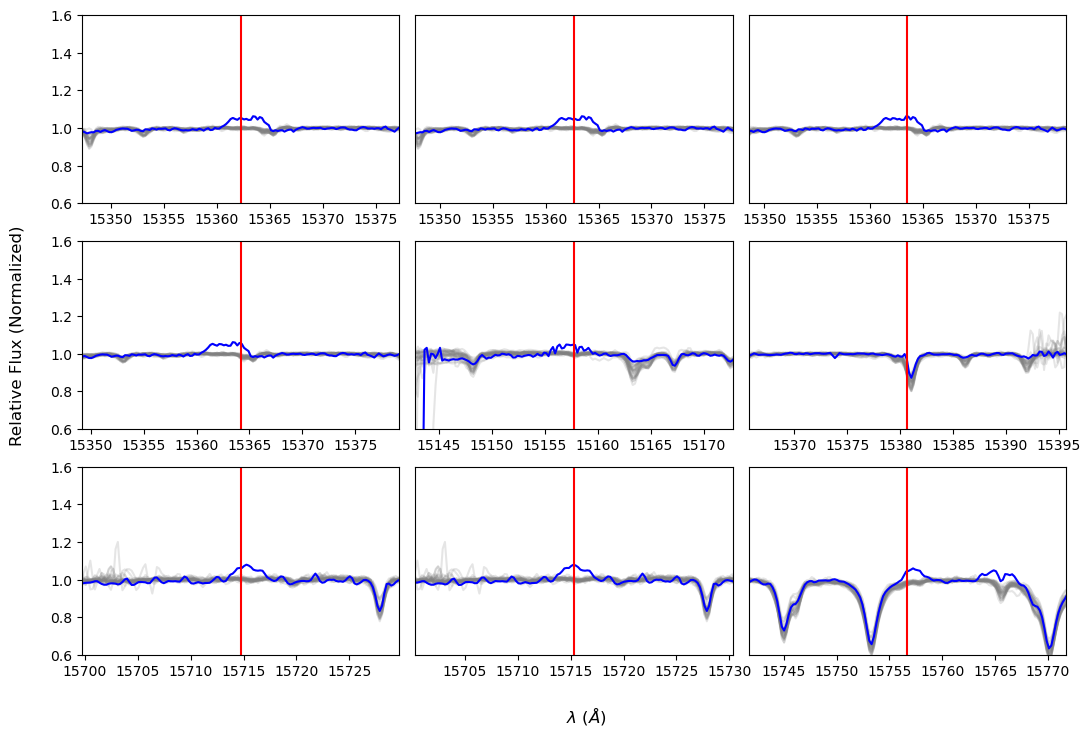

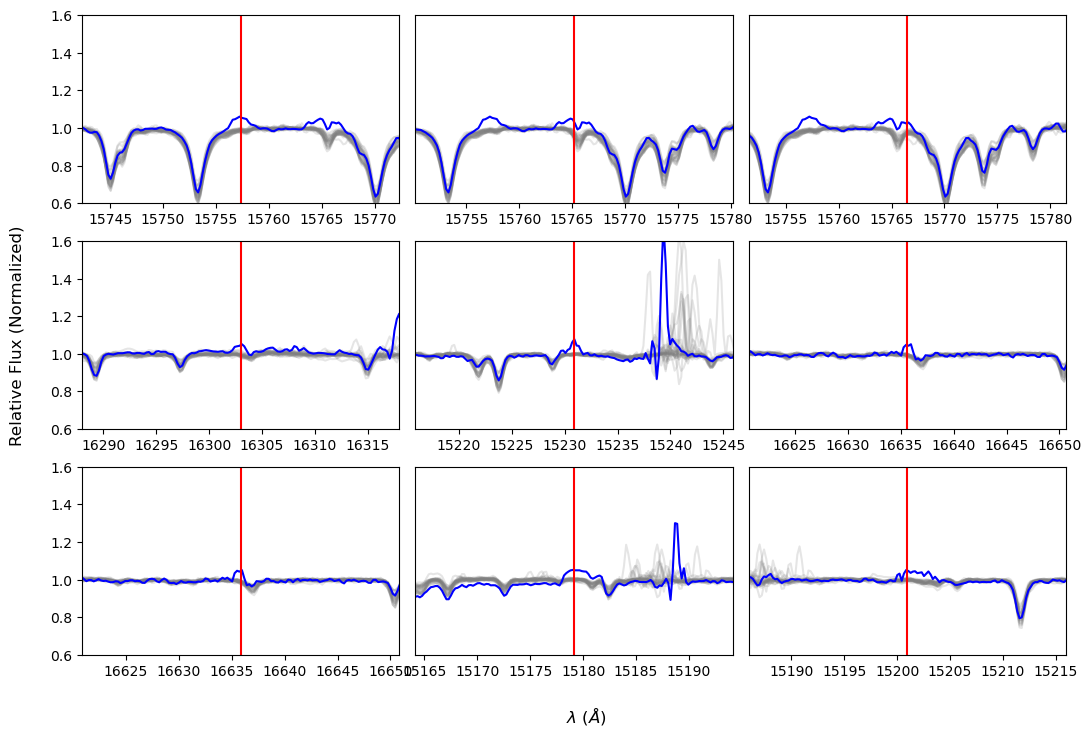

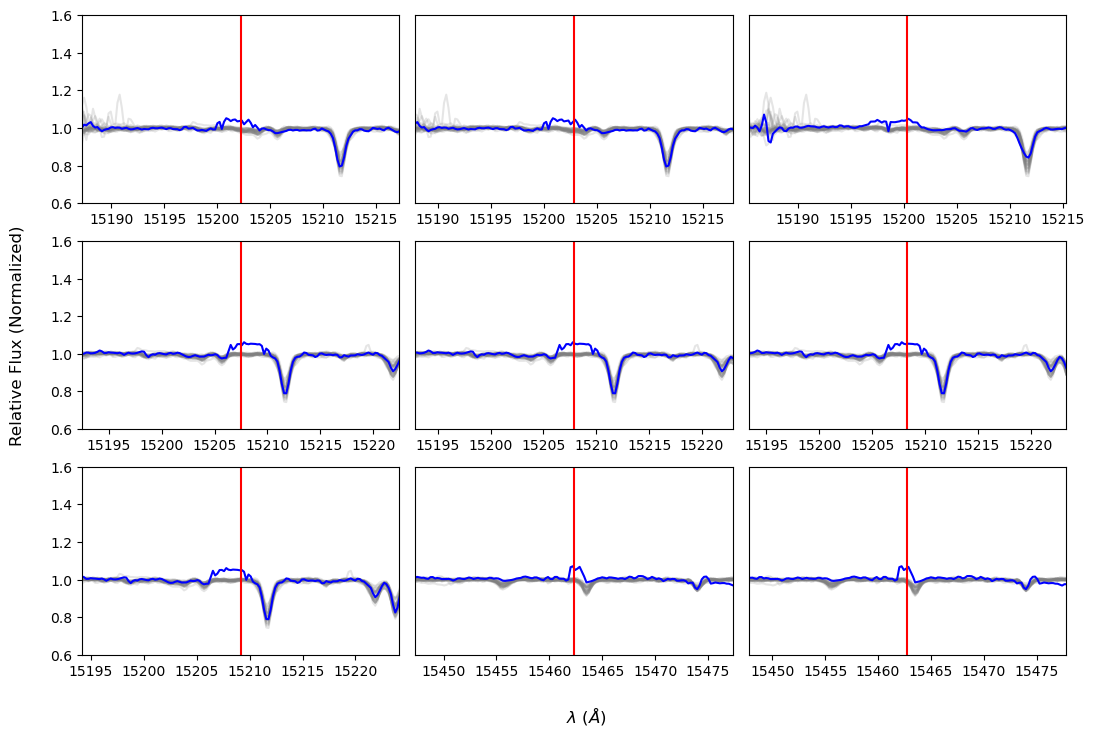

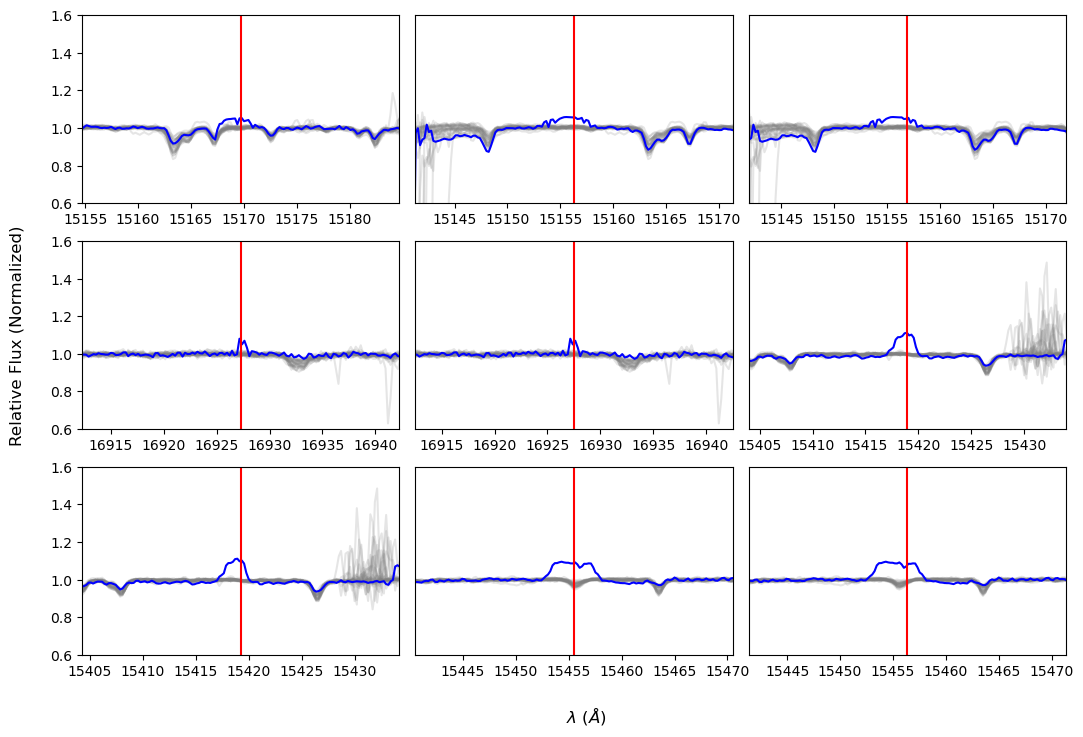

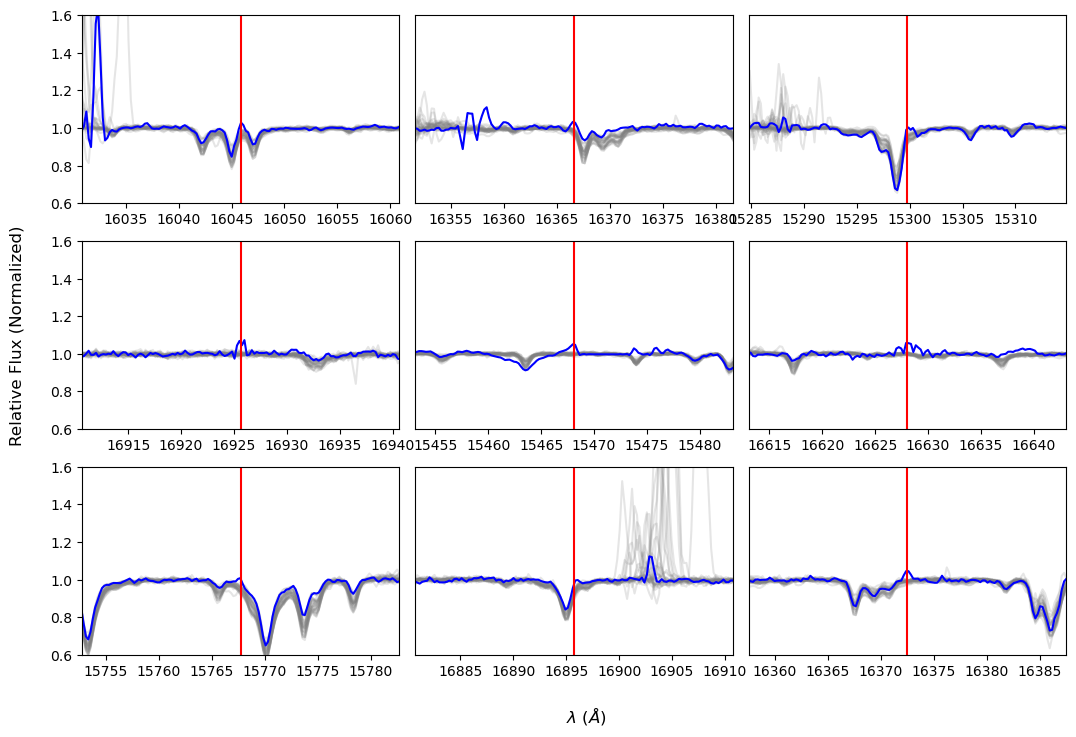

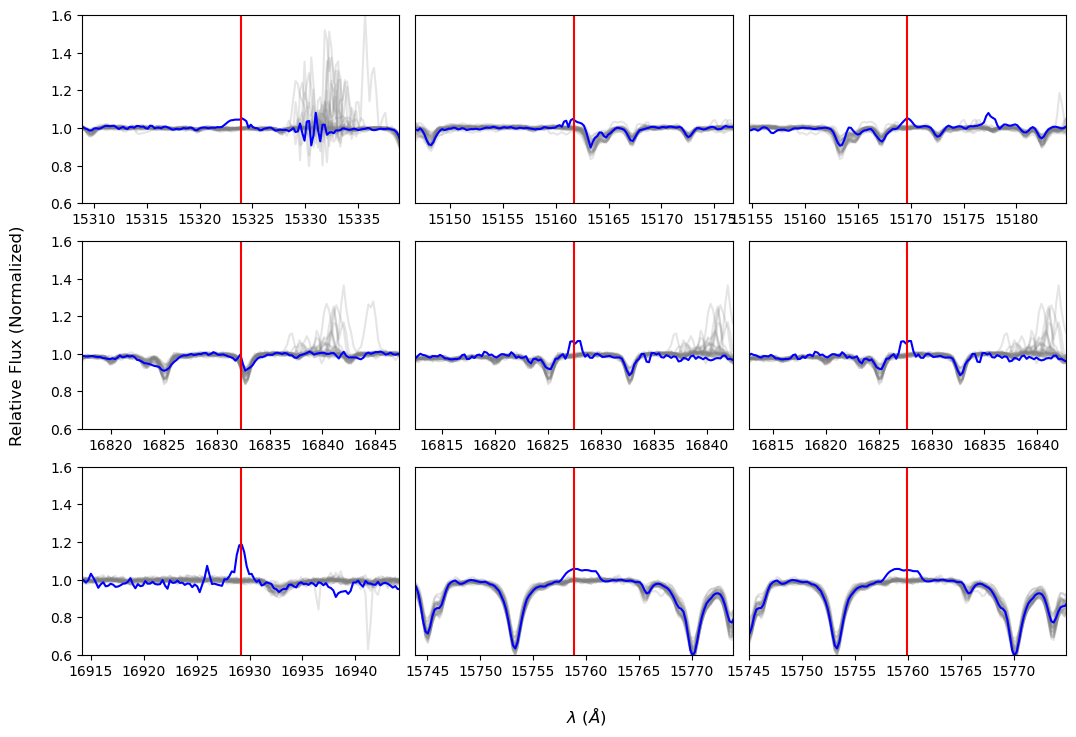

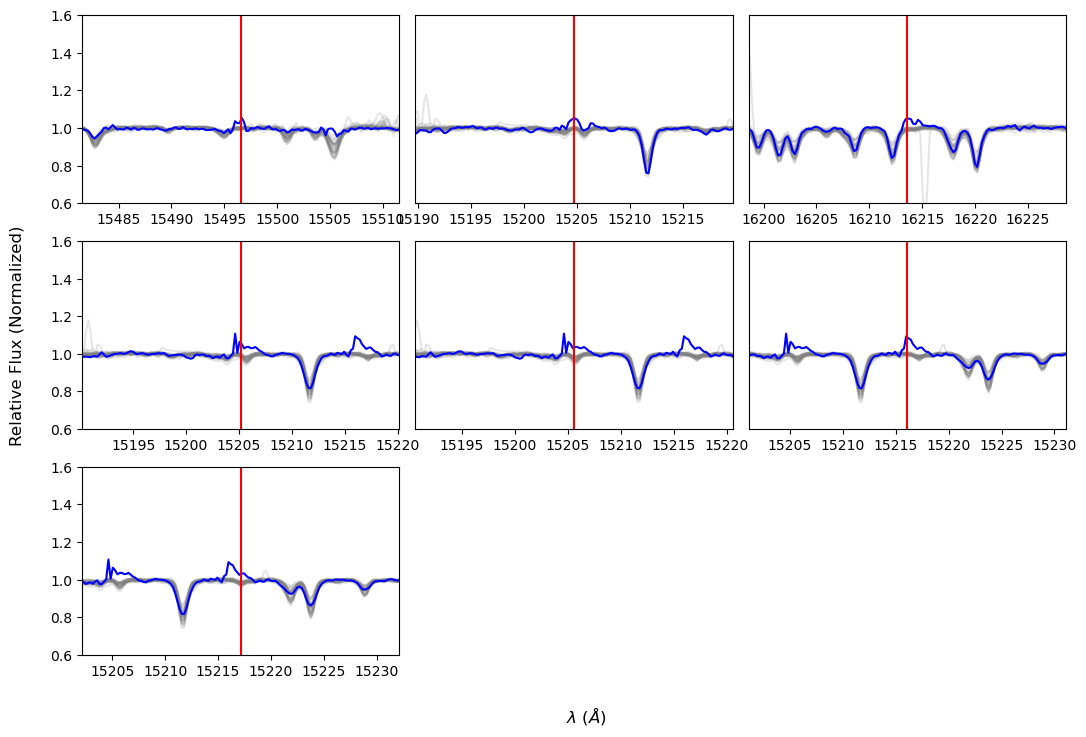

In [20]:
# Plot category 1 (Candidates)

c = 0

candidates_class = categories[c]

for j in range(0,int(len(candidates_class)/9 + 1)):

    fig = plt.figure(figsize=(12,8))
    
    gs = gridspec.GridSpec(3, 3, left=0.08, right=0.9, bottom=0.1, top=0.9, wspace=0.05)
    
    for i in range(0,9):
        
        n = i + 9*j
        if n >= len(candidates_class):
            break
        
        ax = fig.add_subplot(gs[int(i/3), i%3])
        spec_id = int(candidates_class[n,1])

        wave = candidates_class[n,2]
        
        ax.plot(ds.wave, norm_flux[0:30].T, alpha=0.2, color='gray')
        ax.plot(ds.wave, norm_flux[int(candidates_class[n,1])], color='blue')
        ax.plot((wave, wave), (0,2), color='red')
        
        ax.set_xlim(wave - 15, wave + 15)
        ax.set_ylim(0.6, 1.6)
    
        if i%3 > 0:
            ax.set_yticks([])
    
    fig.supxlabel(r'$\lambda$ ($\AA$)')
    fig.supylabel(r'Relative Flux (Normalized)')

    fig.savefig('../data/candidates/sheet_%d.png' % j)

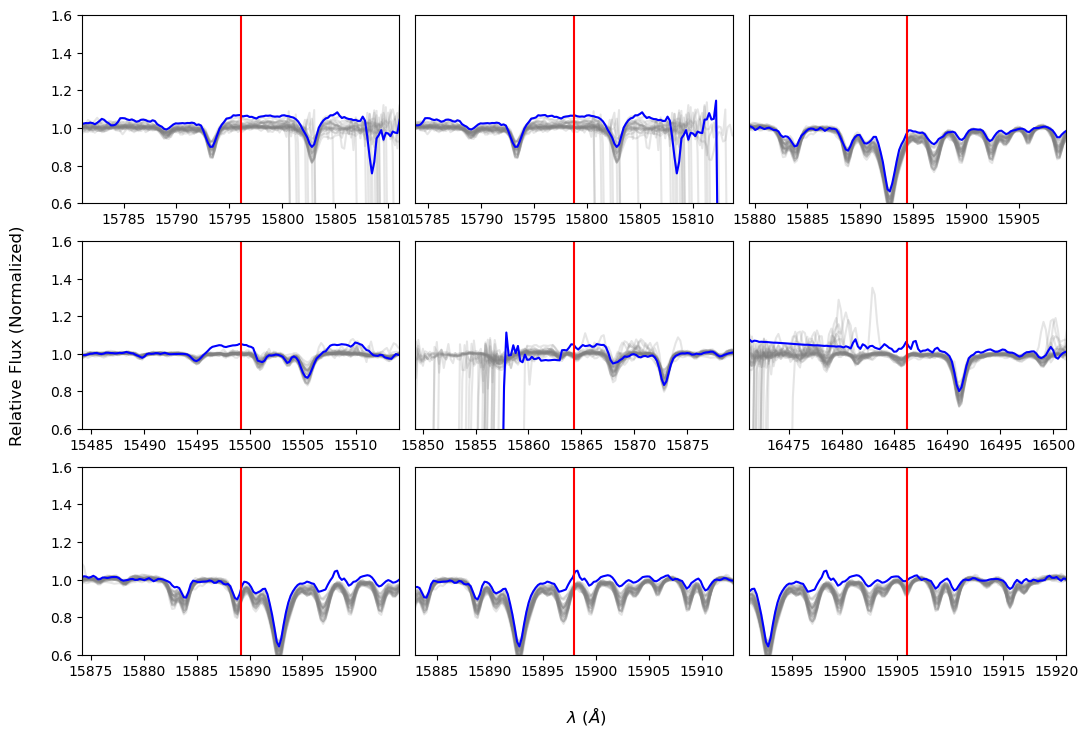

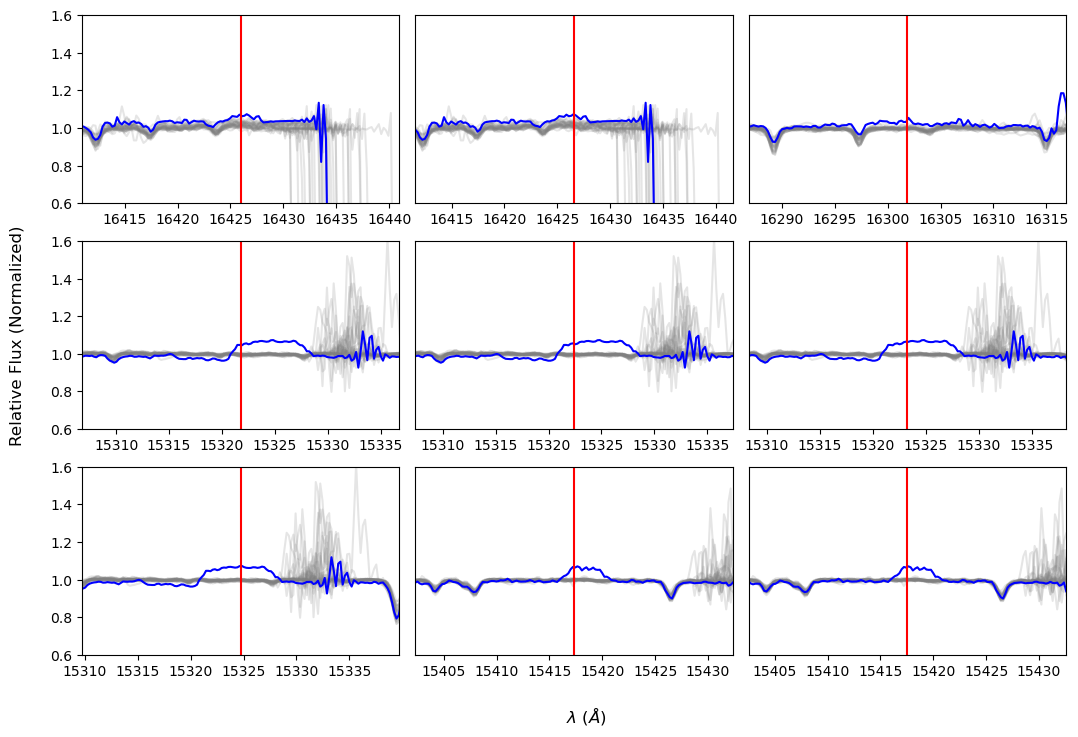

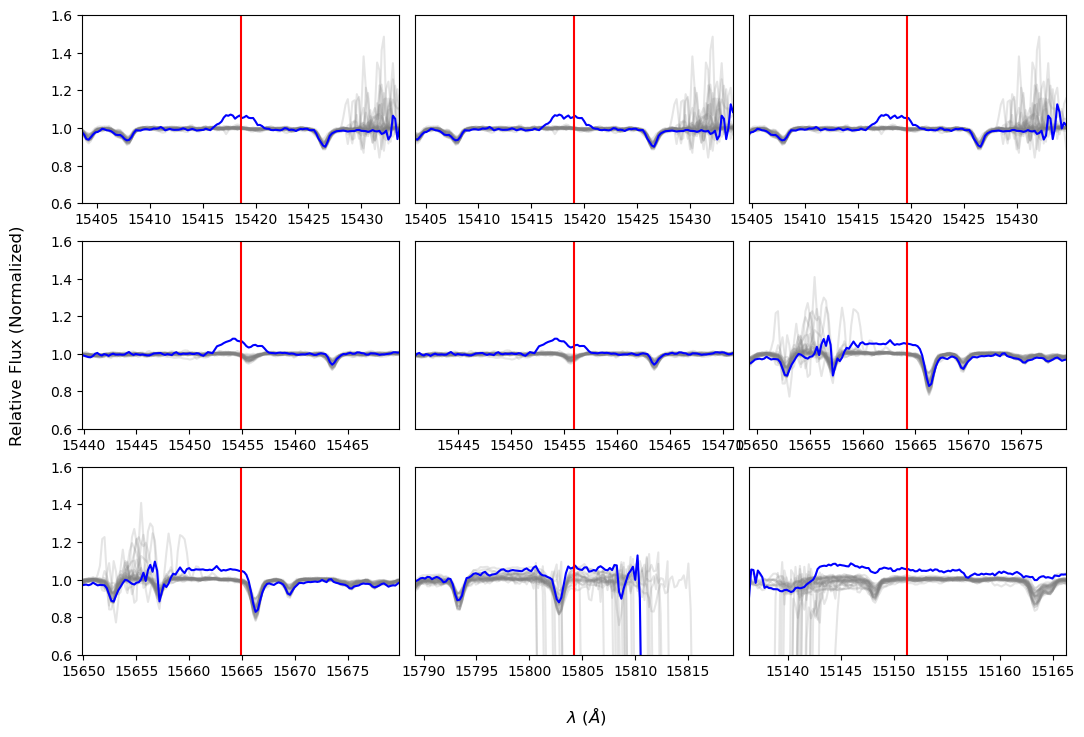

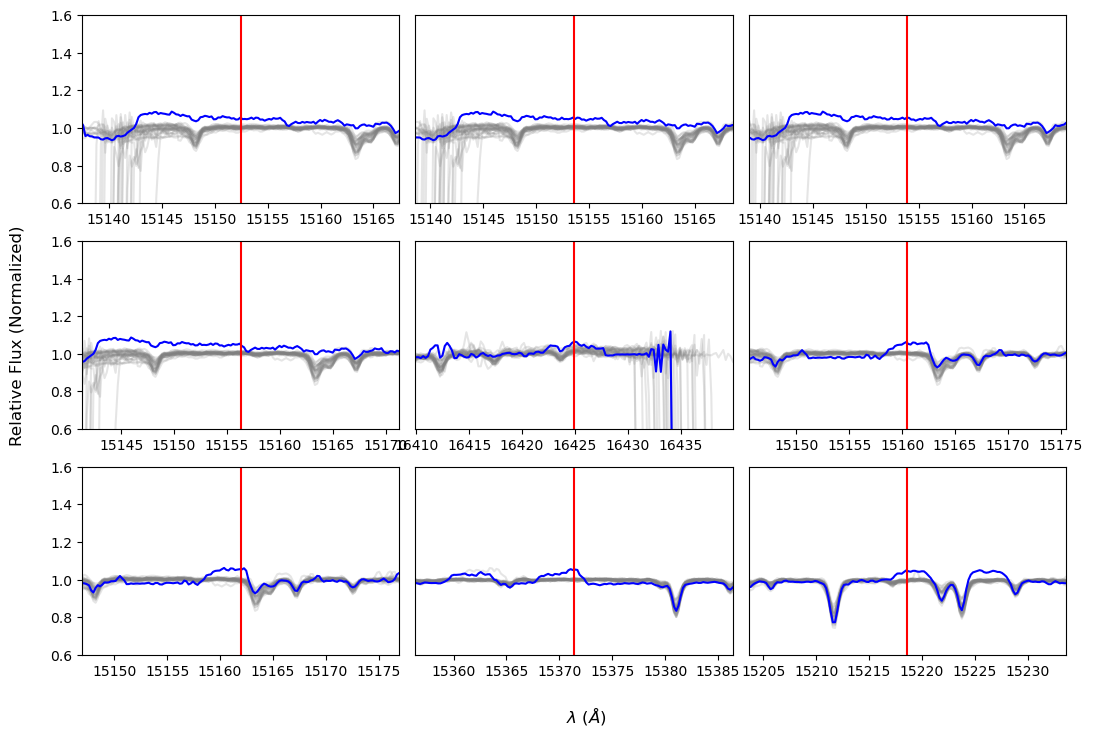

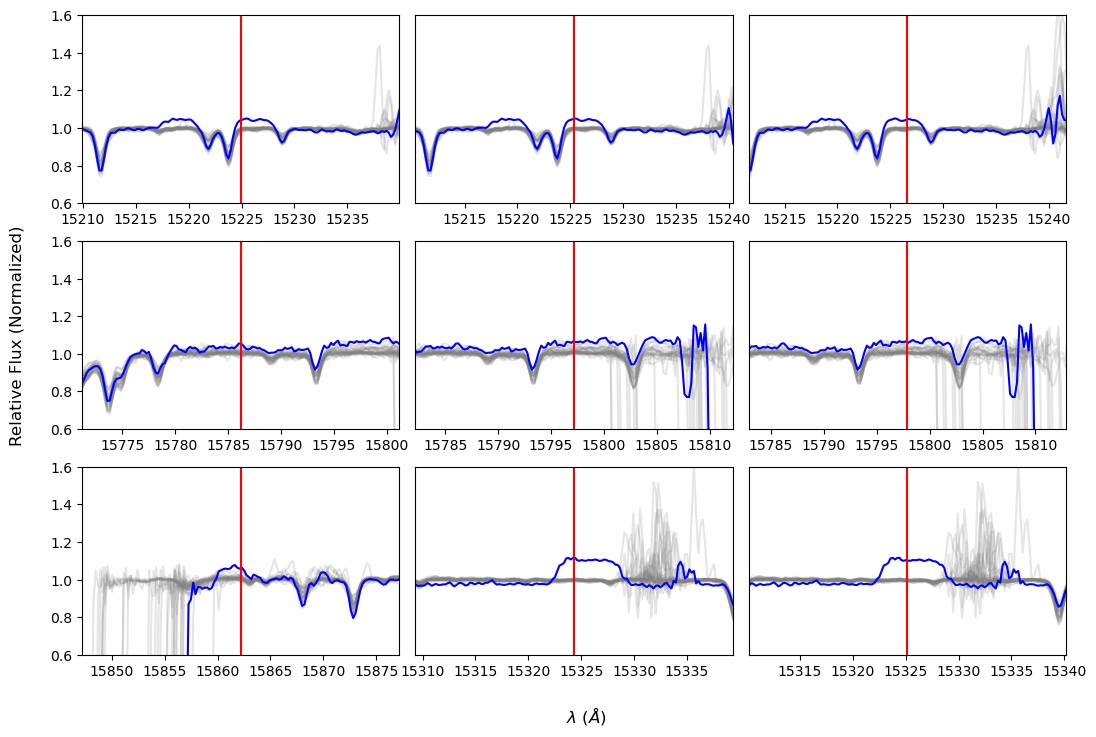

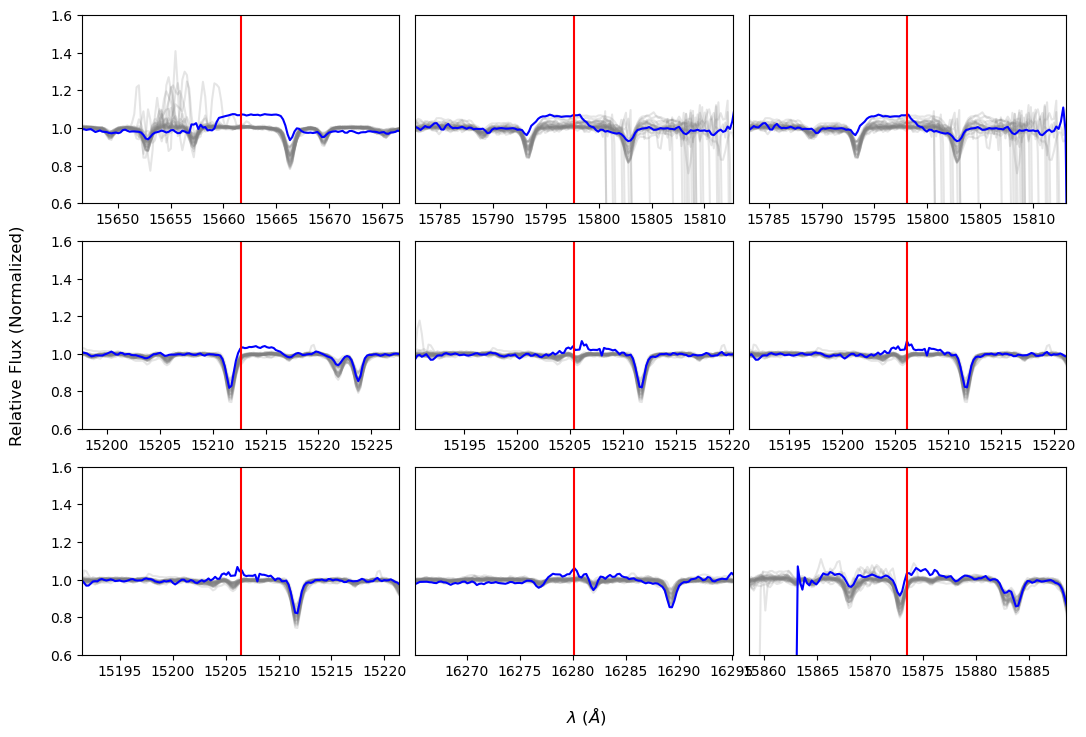

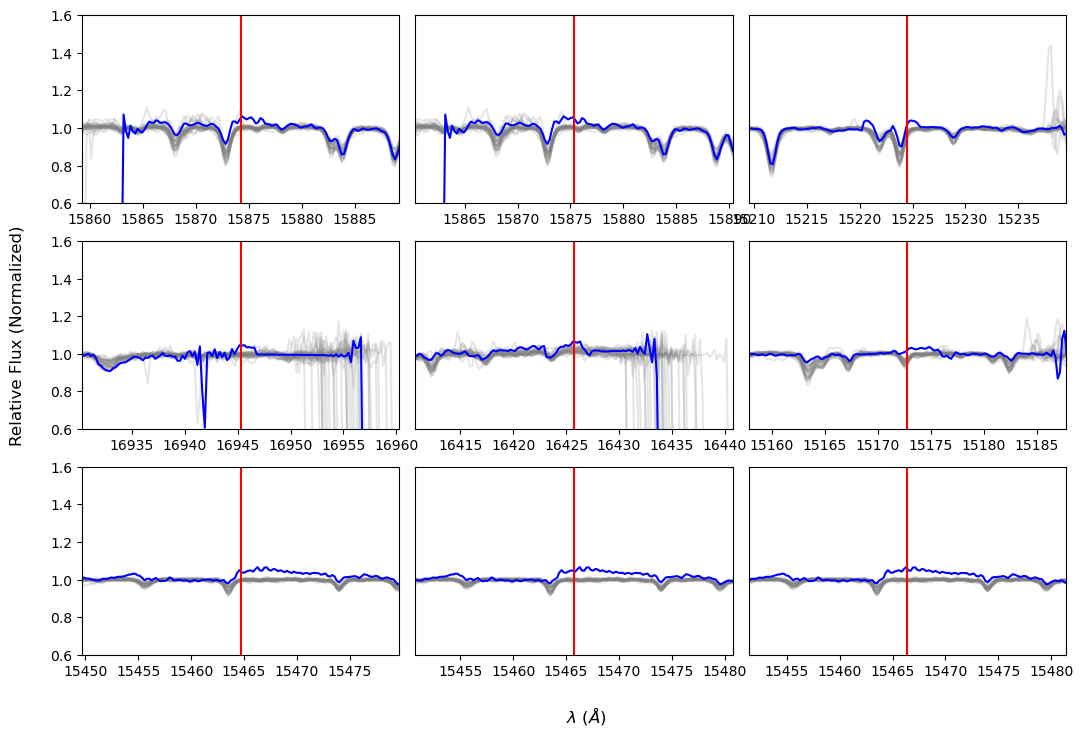

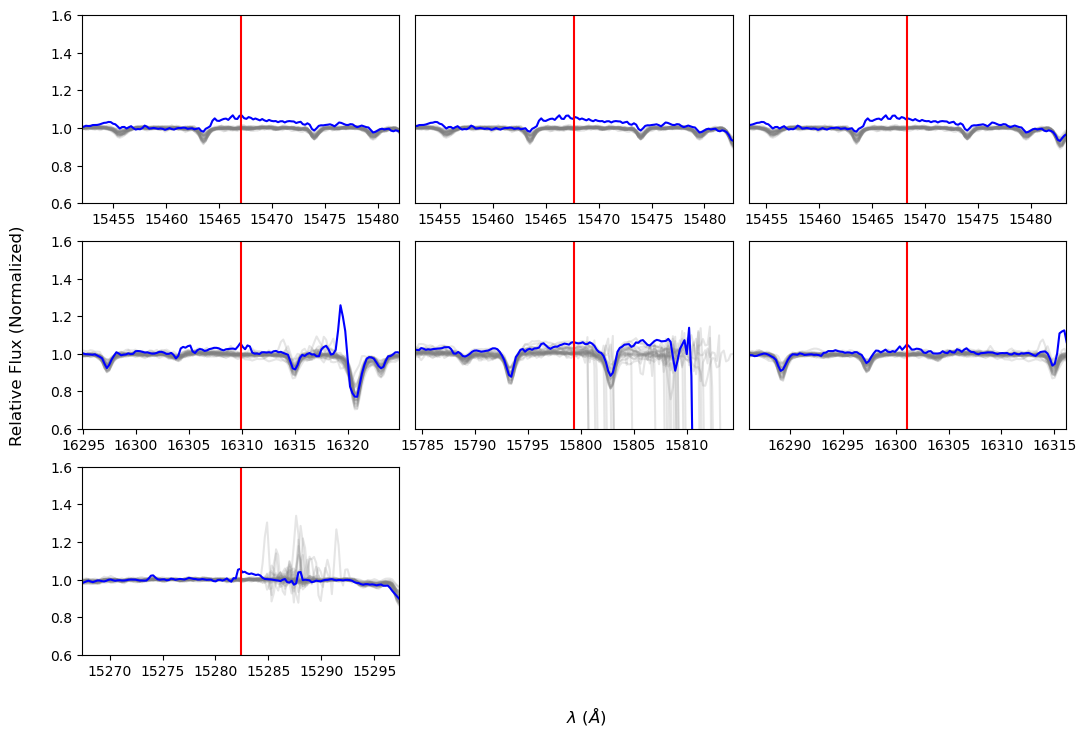

In [16]:
# Plot category 2 (Candidates)

c = 1

candidates_class = categories[c]

for j in range(0,int(len(candidates_class)/9 + 1)):

    fig = plt.figure(figsize=(12,8))
    
    gs = gridspec.GridSpec(3, 3, left=0.08, right=0.9, bottom=0.1, top=0.9, wspace=0.05)
    
    for i in range(0,9):
        
        n = i + 9*j
        if n >= len(candidates_class):
            break
        
        ax = fig.add_subplot(gs[int(i/3), i%3])
        spec_id = int(candidates_class[n,1])

        wave = candidates_class[n,2]
        
        ax.plot(ds.wave, norm_flux[0:30].T, alpha=0.2, color='gray')
        ax.plot(ds.wave, norm_flux[int(candidates_class[n,1])], color='blue')
        ax.plot((wave, wave), (0,2), color='red')
        
        ax.set_xlim(wave - 15, wave + 15)
        ax.set_ylim(0.6, 1.6)
    
        if i%3 > 0:
            ax.set_yticks([])
    
    fig.supxlabel(r'$\lambda$ ($\AA$)')
    fig.supylabel(r'Relative Flux (Normalized)')

    fig.savefig('../data/candidates/sheet_%d.png' % j)

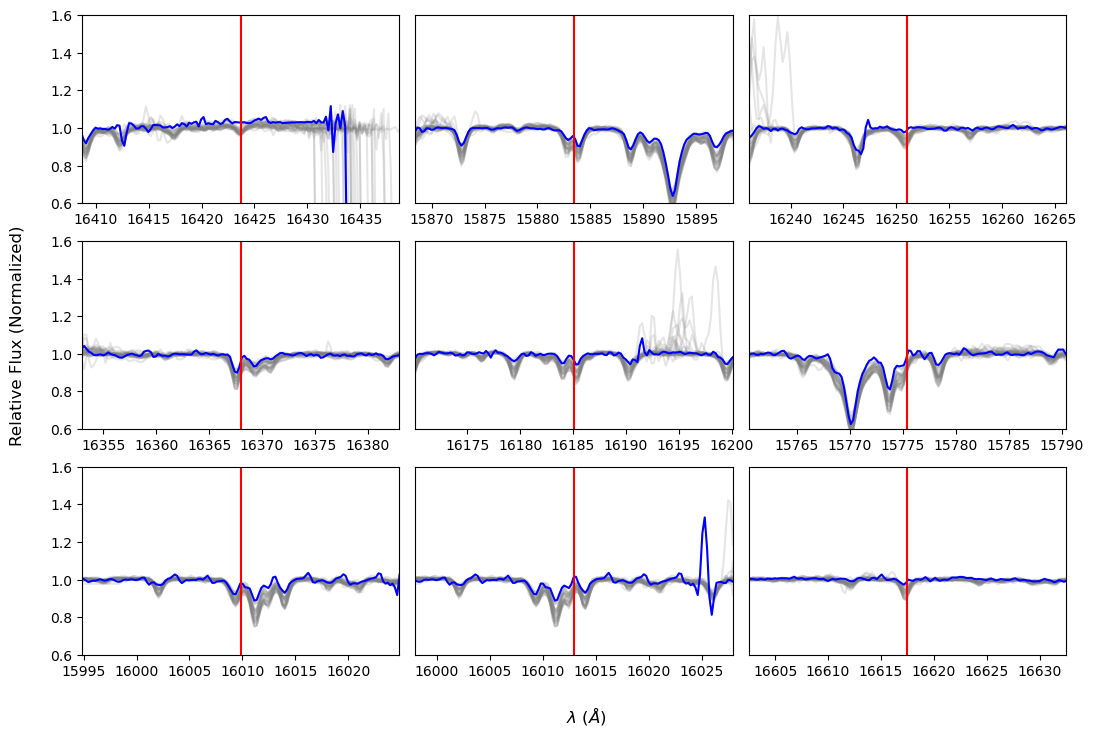

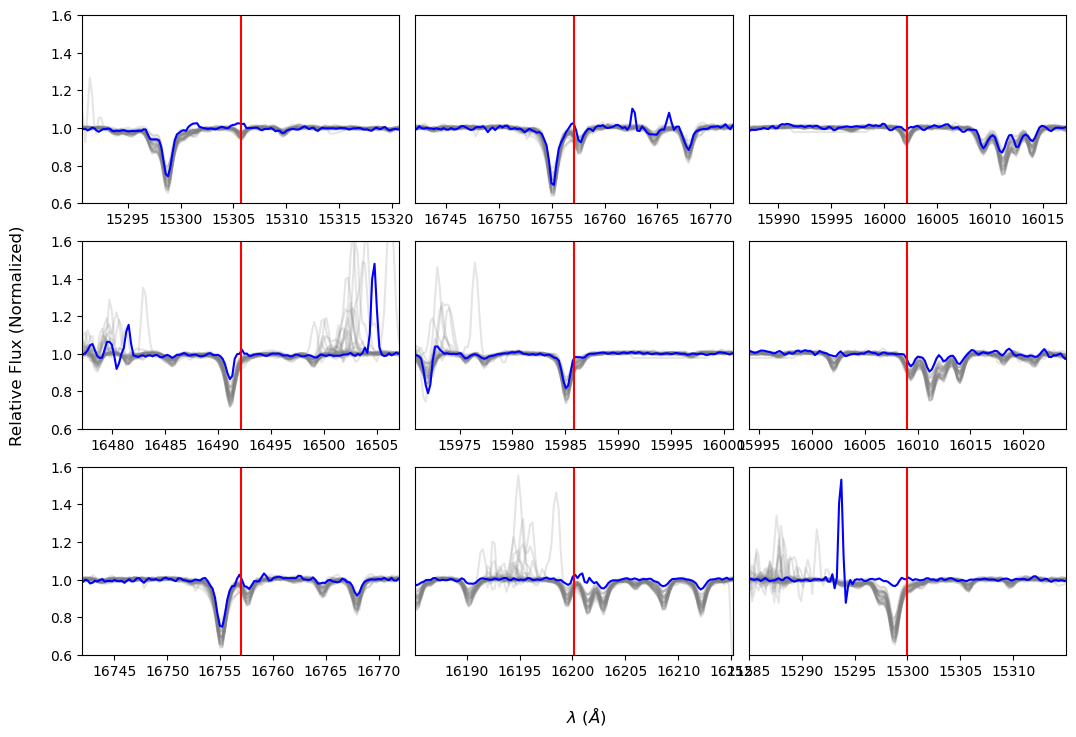

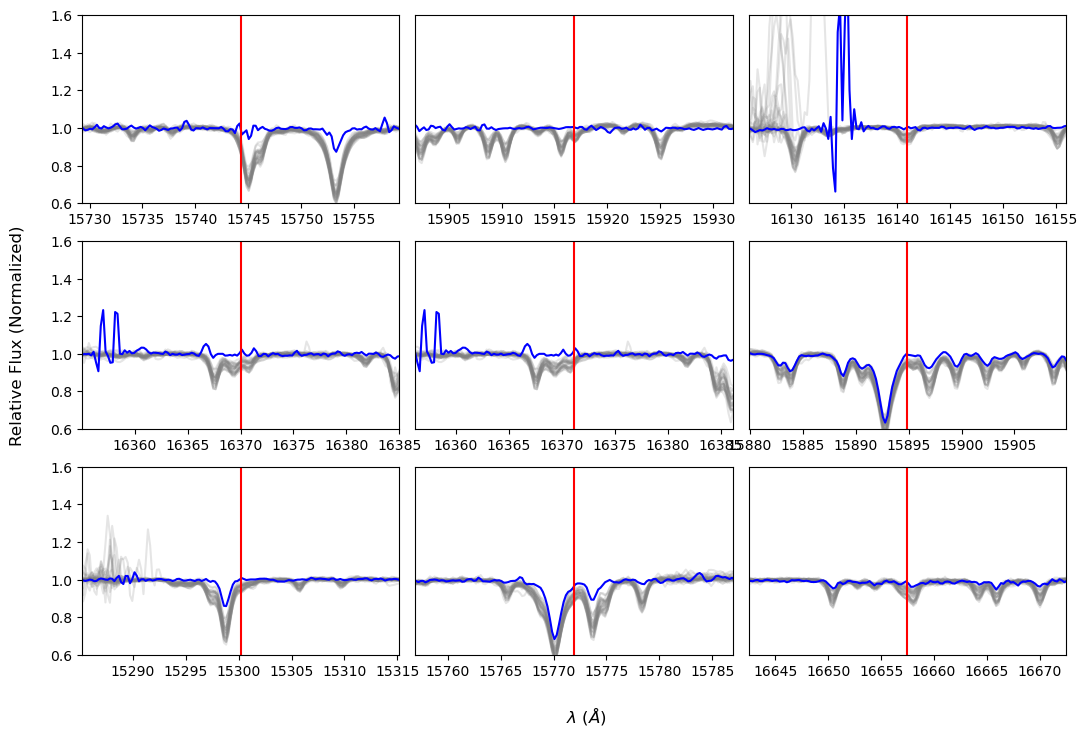

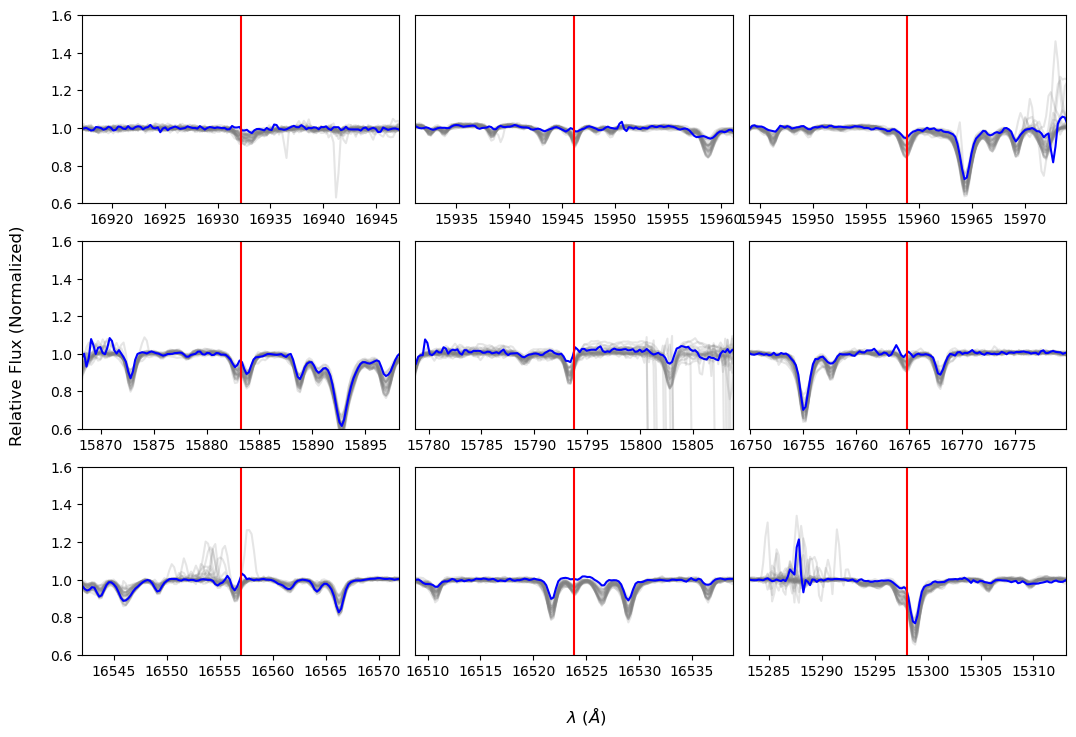

<Figure size 1200x800 with 0 Axes>

In [17]:
# Plot category 3 (Candidates)

c = 2

candidates_class = categories[c]

for j in range(0,int(len(candidates_class)/9 + 1)):

    fig = plt.figure(figsize=(12,8))
    
    gs = gridspec.GridSpec(3, 3, left=0.08, right=0.9, bottom=0.1, top=0.9, wspace=0.05)
    
    for i in range(0,9):
        
        n = i + 9*j
        if n >= len(candidates_class):
            break
        
        ax = fig.add_subplot(gs[int(i/3), i%3])
        spec_id = int(candidates_class[n,1])

        wave = candidates_class[n,2]
        
        ax.plot(ds.wave, norm_flux[0:30].T, alpha=0.2, color='gray')
        ax.plot(ds.wave, norm_flux[int(candidates_class[n,1])], color='blue')
        ax.plot((wave, wave), (0,2), color='red')
        
        ax.set_xlim(wave - 15, wave + 15)
        ax.set_ylim(0.6, 1.6)
    
        if i%3 > 0:
            ax.set_yticks([])
    
    fig.supxlabel(r'$\lambda$ ($\AA$)')
    fig.supylabel(r'Relative Flux (Normalized)')

    fig.savefig('../data/candidates/sheet_%d.png' % j)

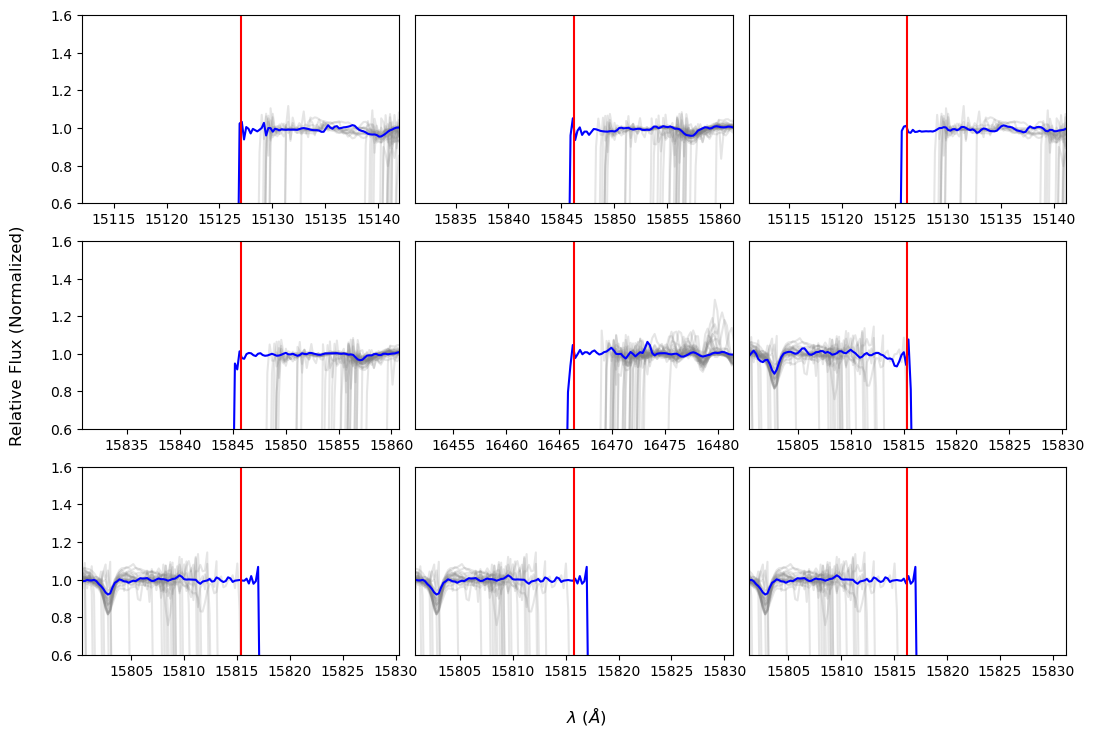

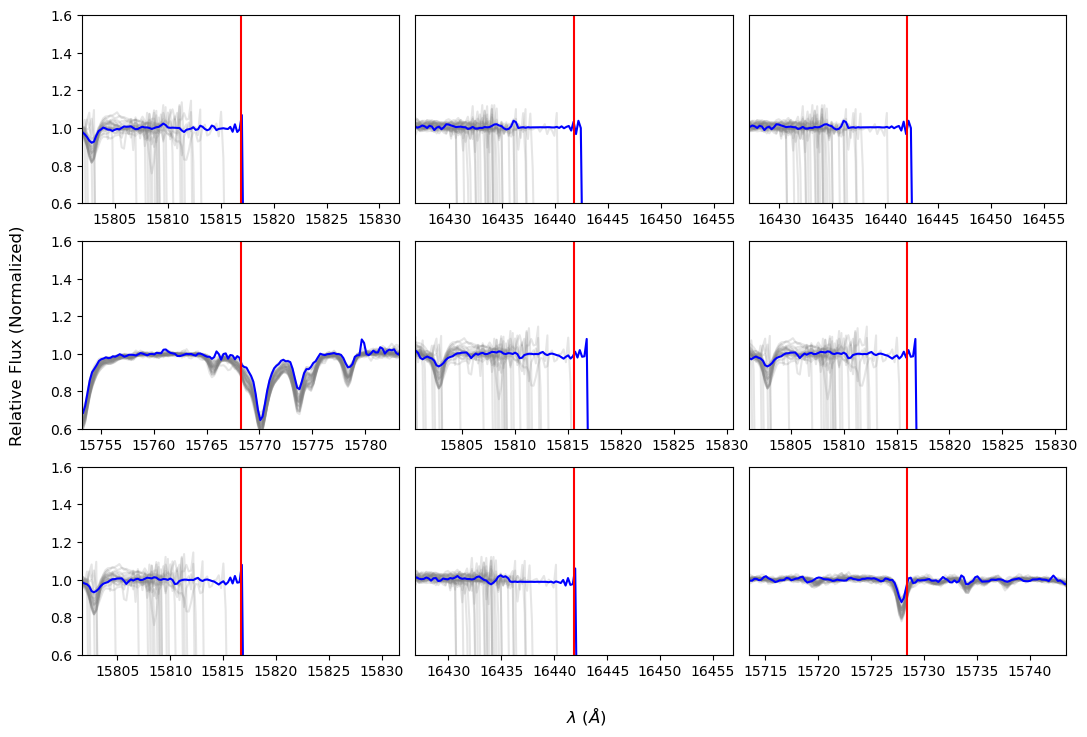

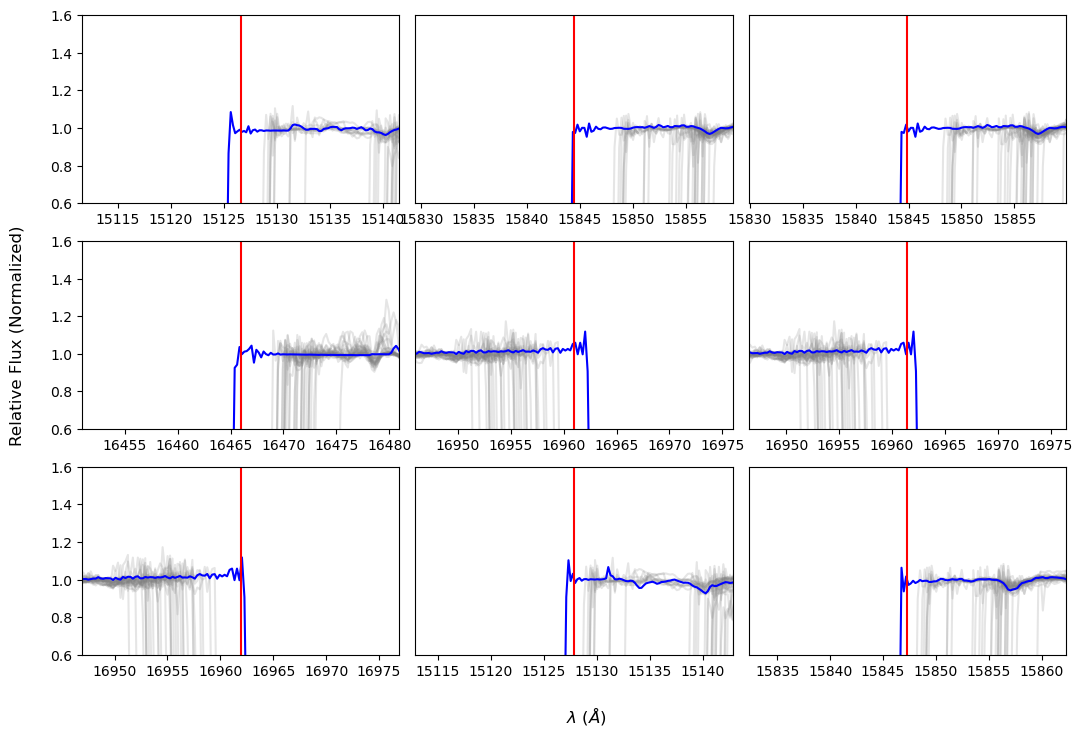

<Figure size 1200x800 with 0 Axes>

In [18]:
# Plot category 4 (Candidates)

c = 3

candidates_class = categories[c]

for j in range(0,int(len(candidates_class)/9 + 1)):

    fig = plt.figure(figsize=(12,8))
    
    gs = gridspec.GridSpec(3, 3, left=0.08, right=0.9, bottom=0.1, top=0.9, wspace=0.05)
    
    for i in range(0,9):
        
        n = i + 9*j
        if n >= len(candidates_class):
            break
        
        ax = fig.add_subplot(gs[int(i/3), i%3])
        spec_id = int(candidates_class[n,1])

        wave = candidates_class[n,2]
        
        ax.plot(ds.wave, norm_flux[0:30].T, alpha=0.2, color='gray')
        ax.plot(ds.wave, norm_flux[int(candidates_class[n,1])], color='blue')
        ax.plot((wave, wave), (0,2), color='red')
        
        ax.set_xlim(wave - 15, wave + 15)
        ax.set_ylim(0.6, 1.6)
    
        if i%3 > 0:
            ax.set_yticks([])
    
    fig.supxlabel(r'$\lambda$ ($\AA$)')
    fig.supylabel(r'Relative Flux (Normalized)')

    fig.savefig('../data/candidates/sheet_%d.png' % j)

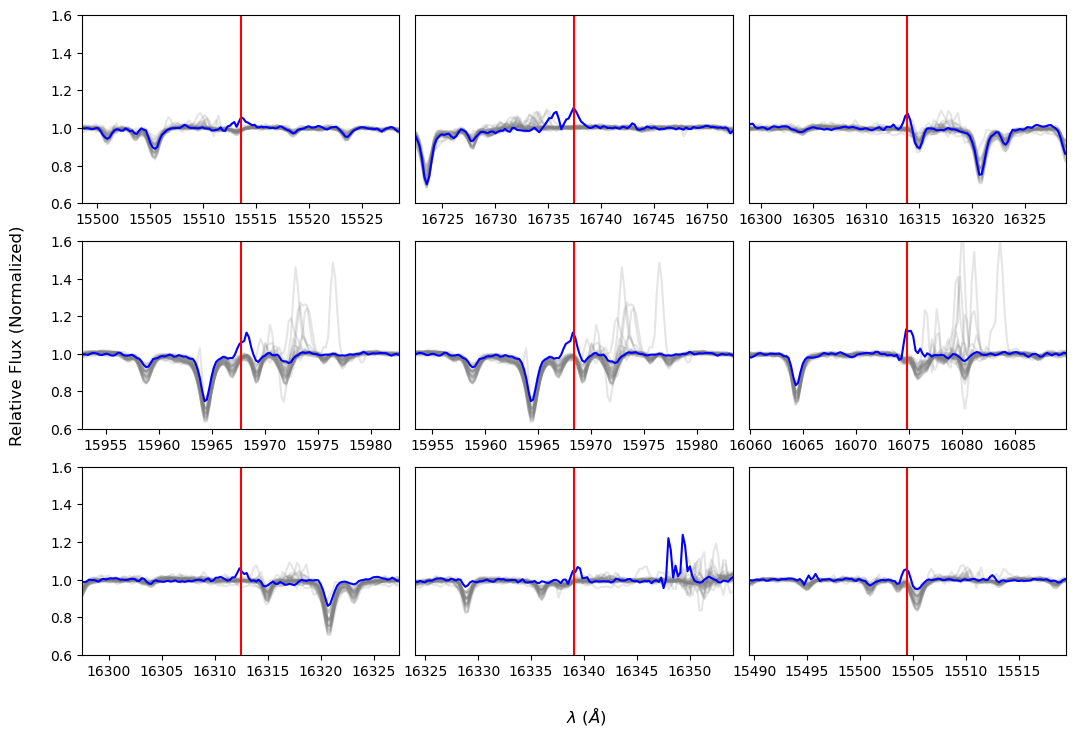

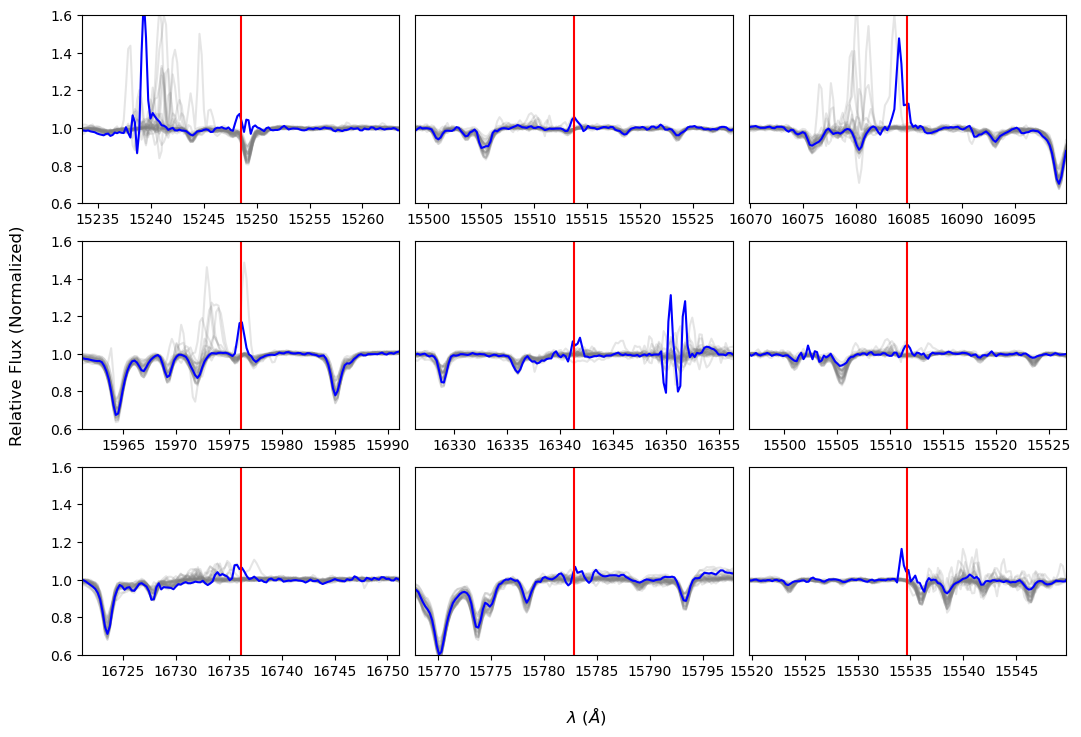

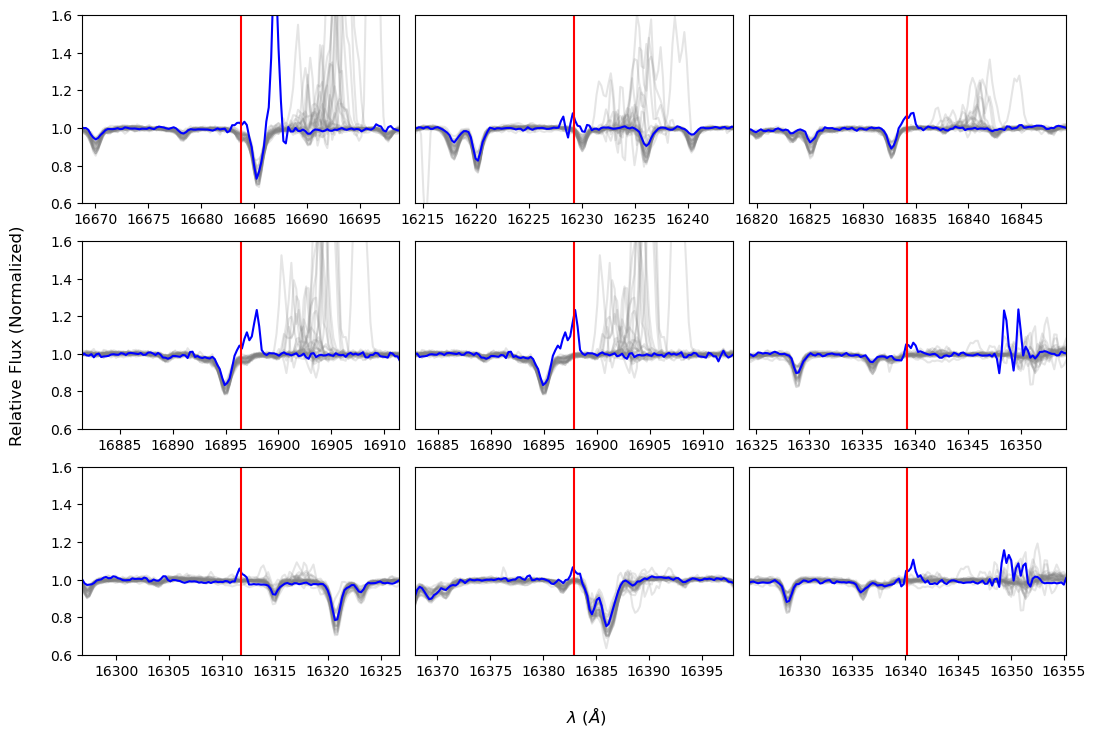

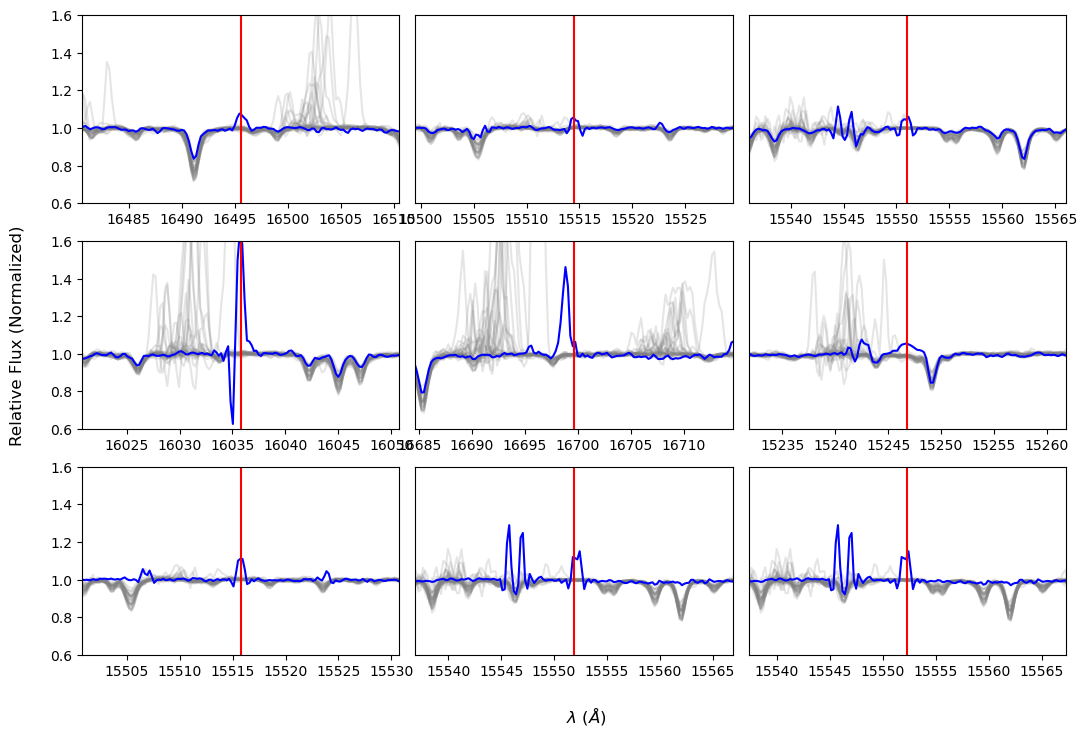

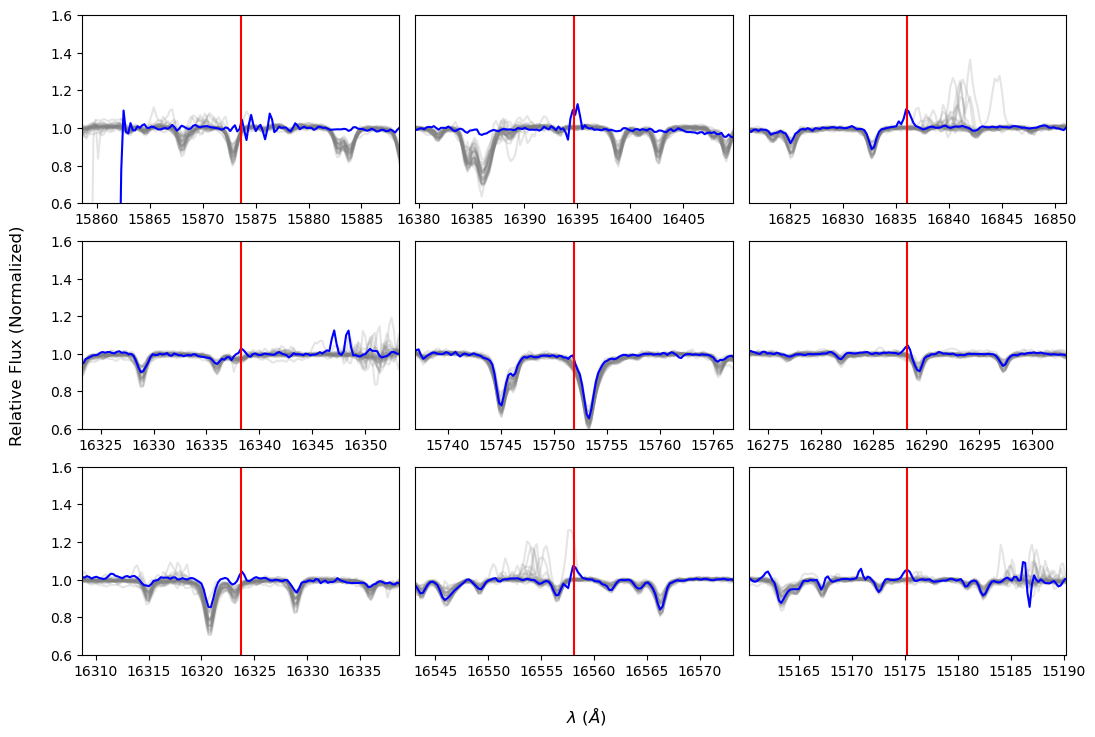

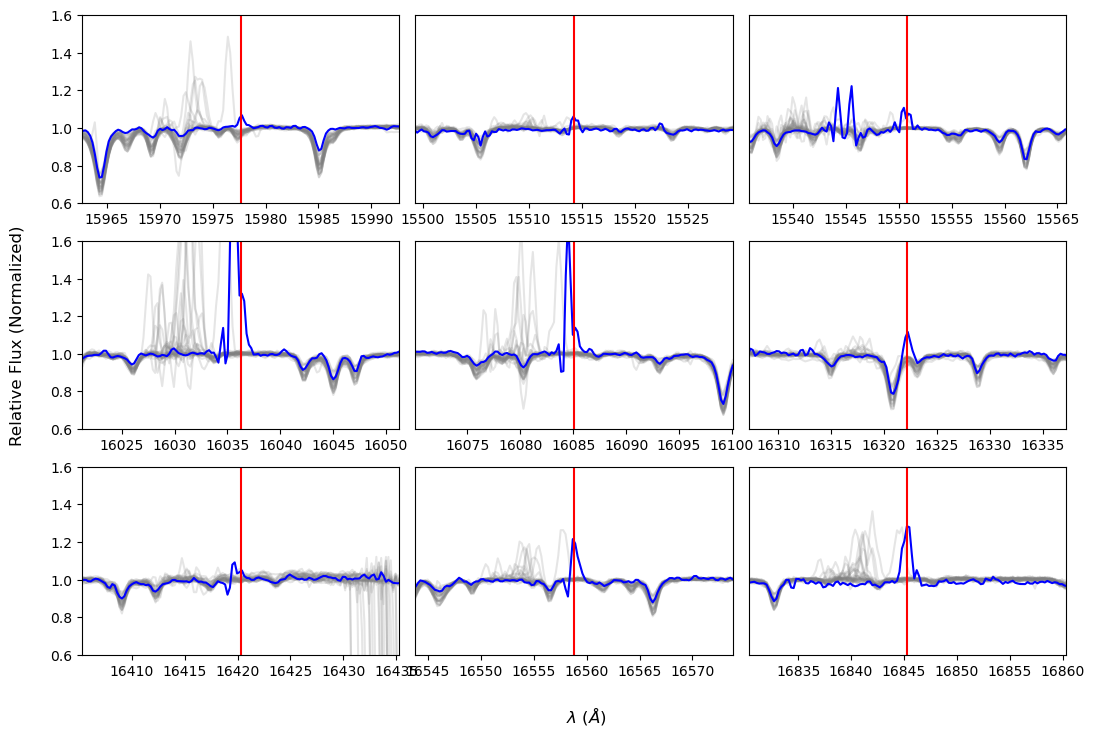

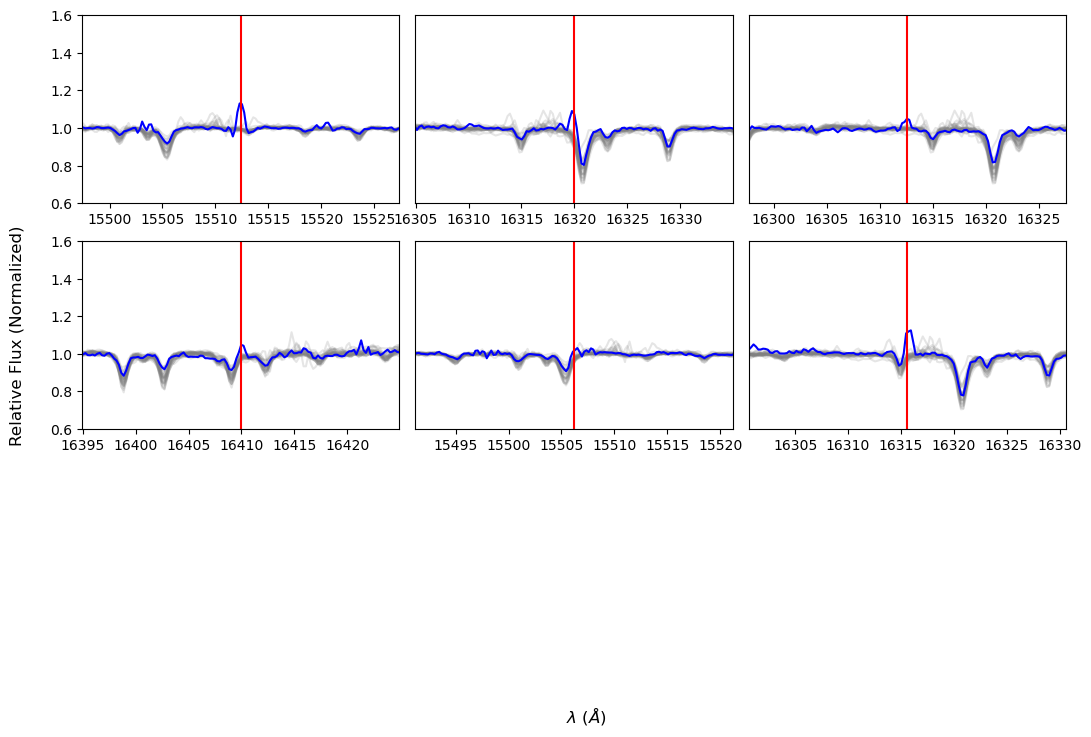

In [19]:
# Plot category 5 (Candidates)

c = 4

candidates_class = categories[c]

for j in range(0,int(len(candidates_class)/9 + 1)):

    fig = plt.figure(figsize=(12,8))
    
    gs = gridspec.GridSpec(3, 3, left=0.08, right=0.9, bottom=0.1, top=0.9, wspace=0.05)
    
    for i in range(0,9):
        
        n = i + 9*j
        if n >= len(candidates_class):
            break
        
        ax = fig.add_subplot(gs[int(i/3), i%3])
        spec_id = int(candidates_class[n,1])

        wave = candidates_class[n,2]
        
        ax.plot(ds.wave, norm_flux[0:30].T, alpha=0.2, color='gray')
        ax.plot(ds.wave, norm_flux[int(candidates_class[n,1])], color='blue')
        ax.plot((wave, wave), (0,2), color='red')
        
        ax.set_xlim(wave - 15, wave + 15)
        ax.set_ylim(0.6, 1.6)
    
        if i%3 > 0:
            ax.set_yticks([])
    
    fig.supxlabel(r'$\lambda$ ($\AA$)')
    fig.supylabel(r'Relative Flux (Normalized)')

    fig.savefig('../data/candidates/sheet_%d.png' % j)

In [94]:
selections = [
        [8, 25, 30, 32, 40, 42],
        [0, 15, 26, 34, 35, 69],
        [0, 8, 17, 19, 24, 29],
        [0, 1, 2, 3, 4, 5],
        [0, 11, 12, 14, 22, 30]
]

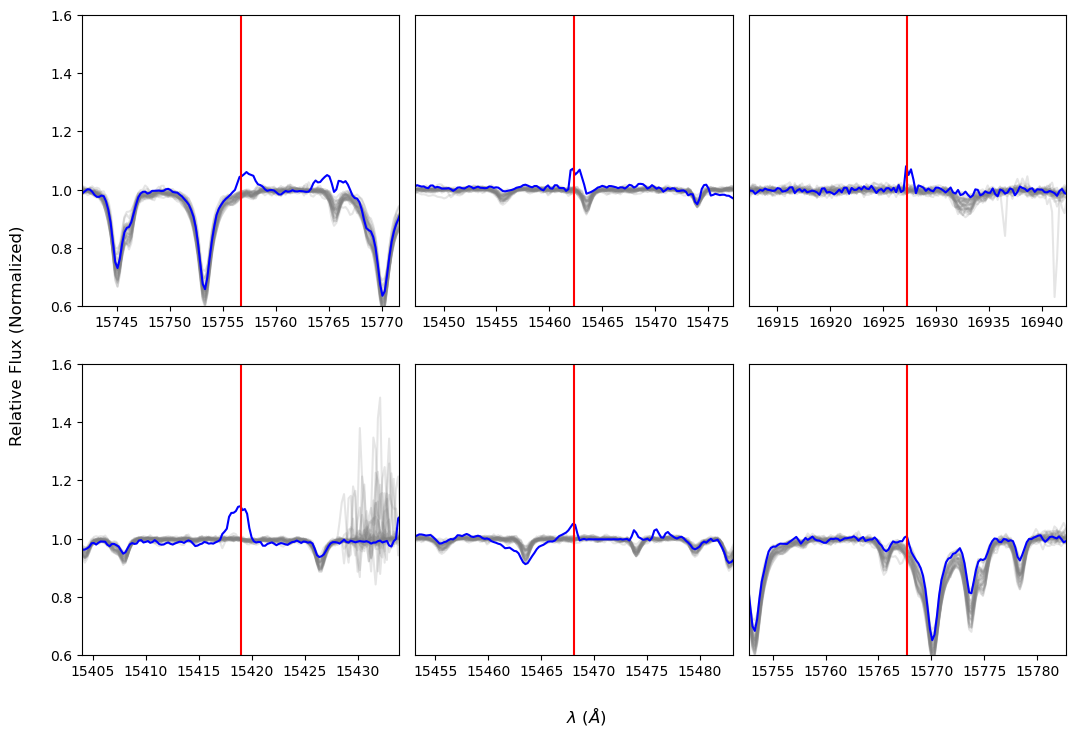

In [24]:
# Plot category 1 Selections (Candidates)

c = 0

candidates_class = categories[c]

fig = plt.figure(figsize=(12,8))
    
gs = gridspec.GridSpec(2, 3, left=0.08, right=0.9, bottom=0.1, top=0.9, wspace=0.05)
    
for i, n in enumerate(selections[c]):
        
    ax = fig.add_subplot(gs[int(i/3), i%3])
    spec_id = int(candidates_class[n,1])

    wave = candidates_class[n,2]
        
    ax.plot(ds.wave, norm_flux[0:30].T, alpha=0.2, color='gray')
    ax.plot(ds.wave, norm_flux[int(candidates_class[n,1])], color='blue')
    ax.plot((wave, wave), (0,2), color='red')
        
    ax.set_xlim(wave - 15, wave + 15)
    ax.set_ylim(0.6, 1.6)
    
    if i%3 > 0:
        ax.set_yticks([])
    
fig.supxlabel(r'$\lambda$ ($\AA$)')
fig.supylabel(r'Relative Flux (Normalized)')

fig.savefig('../data/candidates/sheet_%d.png' % j)

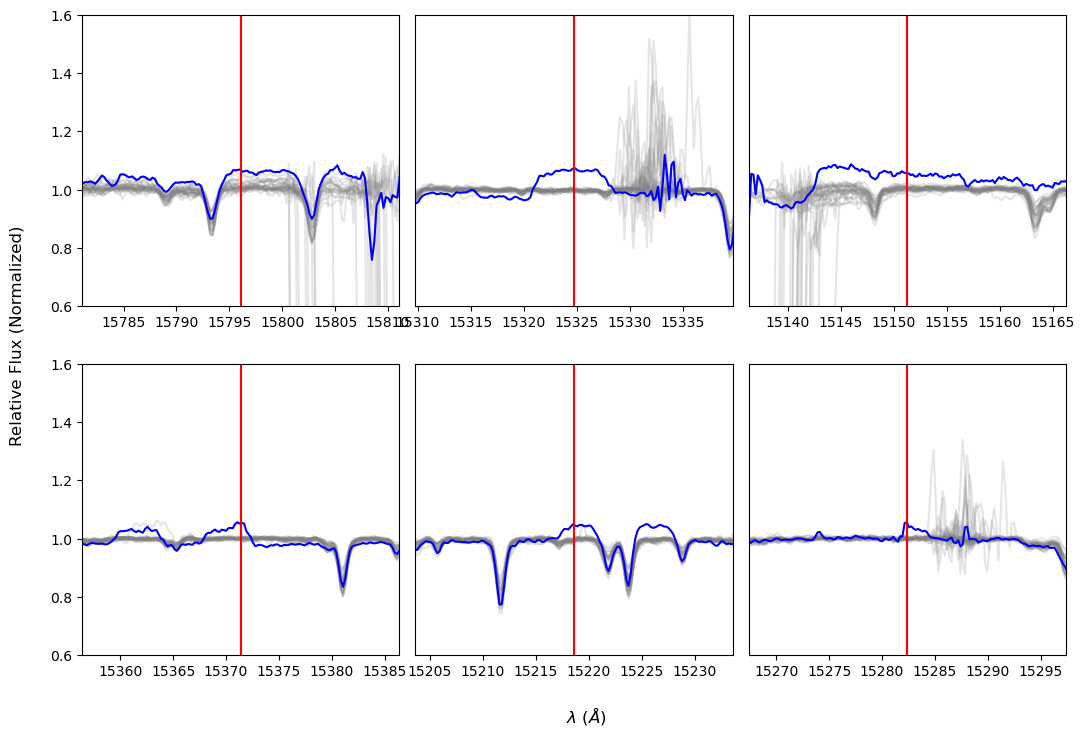

In [26]:
# Plot category 2 Selections (Candidates)

c = 1

candidates_class = categories[c]

fig = plt.figure(figsize=(12,8))
    
gs = gridspec.GridSpec(2, 3, left=0.08, right=0.9, bottom=0.1, top=0.9, wspace=0.05)
    
for i, n in enumerate(selections[c]):
        
    ax = fig.add_subplot(gs[int(i/3), i%3])
    spec_id = int(candidates_class[n,1])

    wave = candidates_class[n,2]
        
    ax.plot(ds.wave, norm_flux[0:30].T, alpha=0.2, color='gray')
    ax.plot(ds.wave, norm_flux[int(candidates_class[n,1])], color='blue')
    ax.plot((wave, wave), (0,2), color='red')
        
    ax.set_xlim(wave - 15, wave + 15)
    ax.set_ylim(0.6, 1.6)
    
    if i%3 > 0:
        ax.set_yticks([])
    
fig.supxlabel(r'$\lambda$ ($\AA$)')
fig.supylabel(r'Relative Flux (Normalized)')

fig.savefig('../data/candidates/sheet_%d.png' % j)

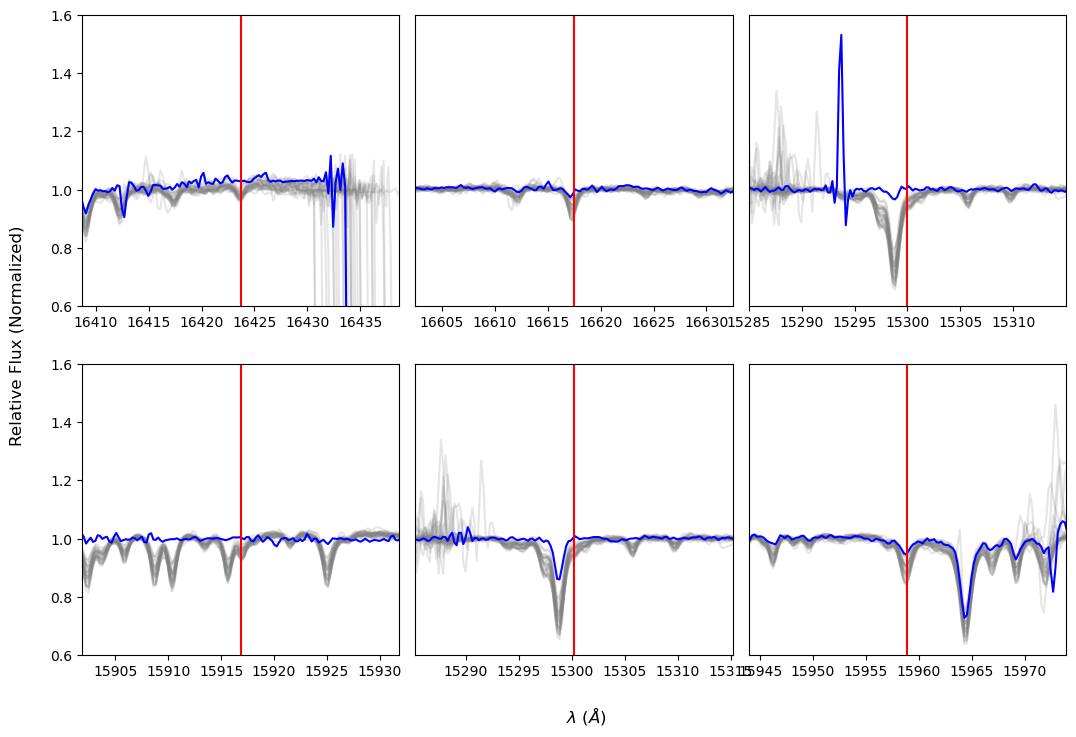

In [27]:
# Plot category 3 Selections (Candidates)

c = 2

candidates_class = categories[c]

fig = plt.figure(figsize=(12,8))
    
gs = gridspec.GridSpec(2, 3, left=0.08, right=0.9, bottom=0.1, top=0.9, wspace=0.05)
    
for i, n in enumerate(selections[c]):
        
    ax = fig.add_subplot(gs[int(i/3), i%3])
    spec_id = int(candidates_class[n,1])

    wave = candidates_class[n,2]
        
    ax.plot(ds.wave, norm_flux[0:30].T, alpha=0.2, color='gray')
    ax.plot(ds.wave, norm_flux[int(candidates_class[n,1])], color='blue')
    ax.plot((wave, wave), (0,2), color='red')
        
    ax.set_xlim(wave - 15, wave + 15)
    ax.set_ylim(0.6, 1.6)
    
    if i%3 > 0:
        ax.set_yticks([])
    
fig.supxlabel(r'$\lambda$ ($\AA$)')
fig.supylabel(r'Relative Flux (Normalized)')

fig.savefig('../data/candidates/sheet_%d.png' % j)

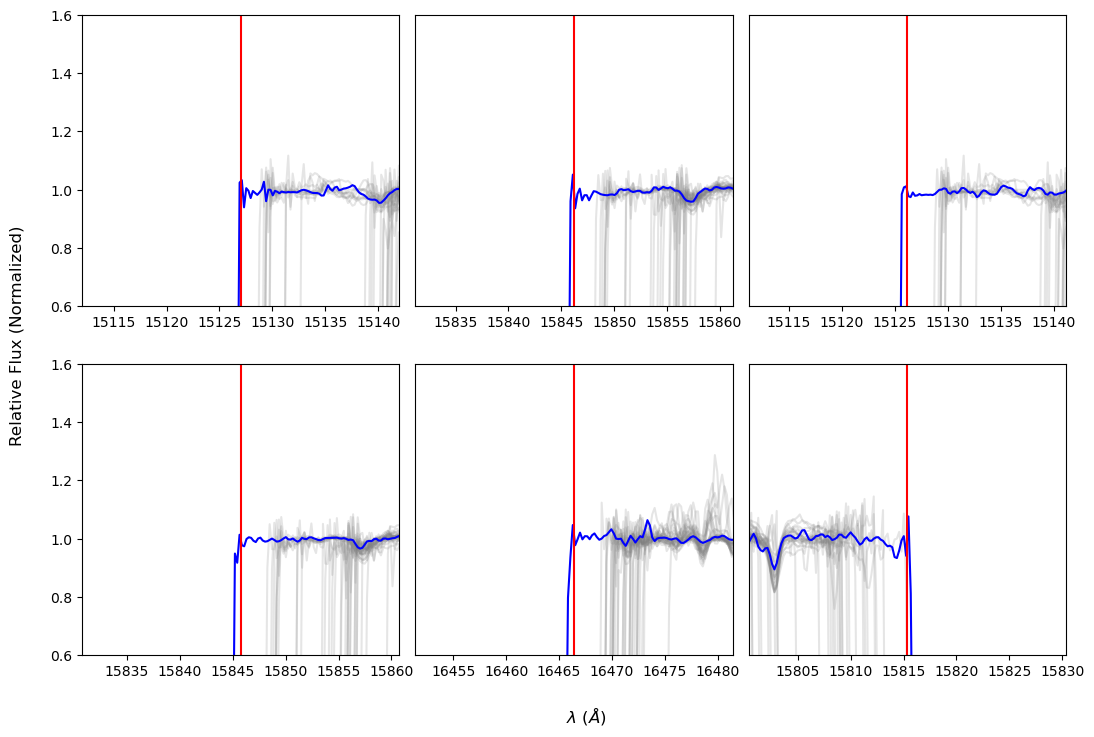

In [95]:
# Plot category 4 Selections (Candidates)

c = 3

candidates_class = categories[c]

fig = plt.figure(figsize=(12,8))
    
gs = gridspec.GridSpec(2, 3, left=0.08, right=0.9, bottom=0.1, top=0.9, wspace=0.05)
    
for i, n in enumerate(selections[c]):
        
    ax = fig.add_subplot(gs[int(i/3), i%3])
    spec_id = int(candidates_class[n,1])

    wave = candidates_class[n,2]
        
    ax.plot(ds.wave, norm_flux[0:30].T, alpha=0.2, color='gray')
    ax.plot(ds.wave, norm_flux[int(candidates_class[n,1])], color='blue')
    ax.plot((wave, wave), (0,2), color='red')
        
    ax.set_xlim(wave - 15, wave + 15)
    ax.set_ylim(0.6, 1.6)
    
    if i%3 > 0:
        ax.set_yticks([])
    
fig.supxlabel(r'$\lambda$ ($\AA$)')
fig.supylabel(r'Relative Flux (Normalized)')

fig.savefig('../data/candidates/sheet_%d.png' % j)

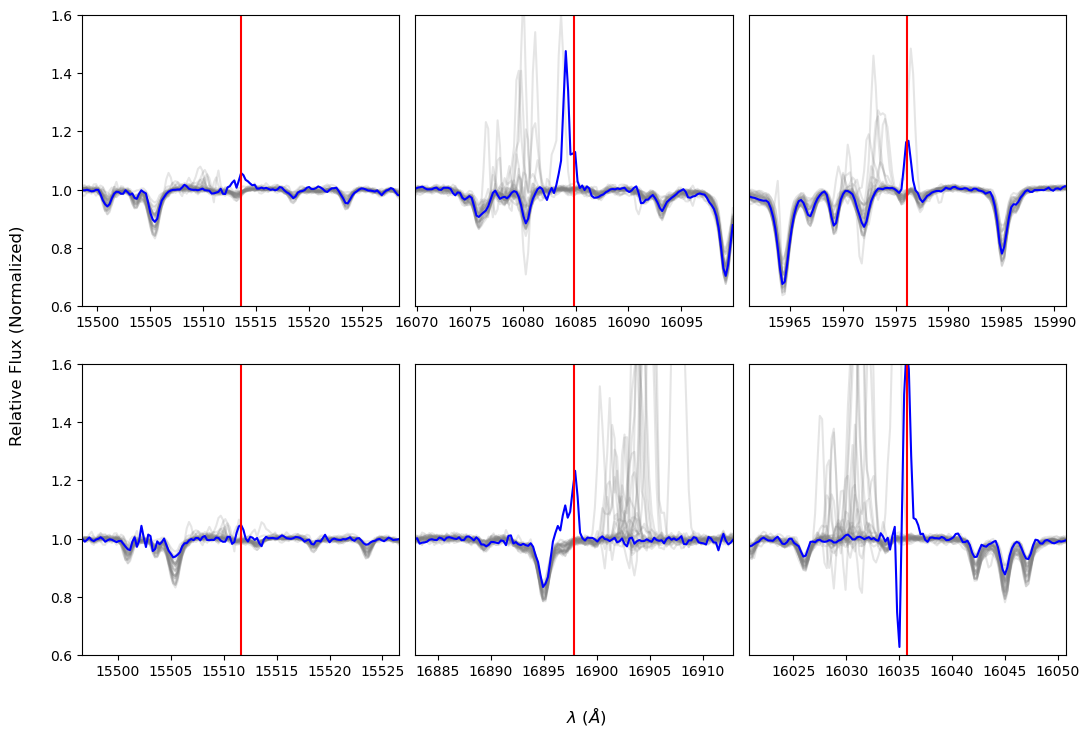

In [30]:
# Plot category 5 Selections (Candidates)

c = 4

candidates_class = categories[c]

fig = plt.figure(figsize=(12,8))
    
gs = gridspec.GridSpec(2, 3, left=0.08, right=0.9, bottom=0.1, top=0.9, wspace=0.05)
    
for i, n in enumerate(selections[c]):
        
    ax = fig.add_subplot(gs[int(i/3), i%3])
    spec_id = int(candidates_class[n,1])

    wave = candidates_class[n,2]
        
    ax.plot(ds.wave, norm_flux[0:30].T, alpha=0.2, color='gray')
    ax.plot(ds.wave, norm_flux[int(candidates_class[n,1])], color='blue')
    ax.plot((wave, wave), (0,2), color='red')
        
    ax.set_xlim(wave - 15, wave + 15)
    ax.set_ylim(0.6, 1.6)
    
    if i%3 > 0:
        ax.set_yticks([])
    
fig.supxlabel(r'$\lambda$ ($\AA$)')
fig.supylabel(r'Relative Flux (Normalized)')

fig.savefig('../data/candidates/sheet_%d.png' % j)

In [44]:
wing_emission_spec_idx = np.array(categories[0][(5, 38, 42, 43, 48),1], dtype=int)

print(wing_emission_spec_idx)

[ 113  837  939  956 1059]


In [93]:
table = Table.read('../data/sample.fits')

table.info

<Table length=1254>
               name                 dtype    shape     class     n_bad 
---------------------------------- -------- ------- ------------ ------
                              FILE  bytes64               Column      0
                         APOGEE_ID  bytes30               Column      0
                         TARGET_ID  bytes58               Column      0
                         APSTAR_ID  bytes71               Column      0
                         ASPCAP_ID  bytes77               Column      0
                         TELESCOPE   bytes6               Column      0
                       LOCATION_ID    int32         MaskedColumn      0
                             FIELD  bytes20               Column      0
                            ALT_ID  bytes30               Column      0
                                RA  float64               Column      0
                               DEC  float64               Column      0
                              GLON  float64 

Text(0, 0.5, '# Stars')

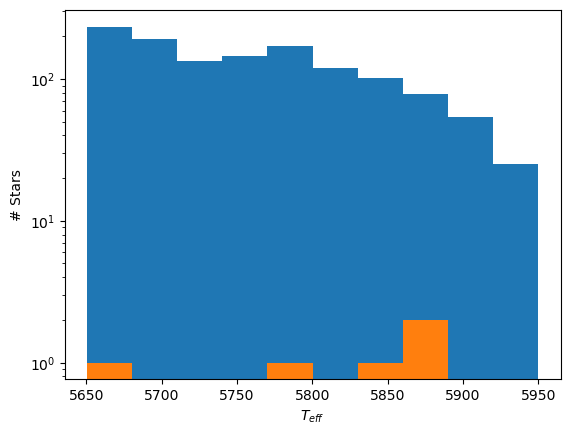

In [67]:
bins = plt.hist(table['TEFF'])[1]
plt.hist(table['TEFF'][wing_emission_spec_idx],bins)
plt.yscale('log')
plt.xlabel(r'$T_{eff}$')
plt.ylabel('# Stars')

Text(0, 0.5, '# Stars')

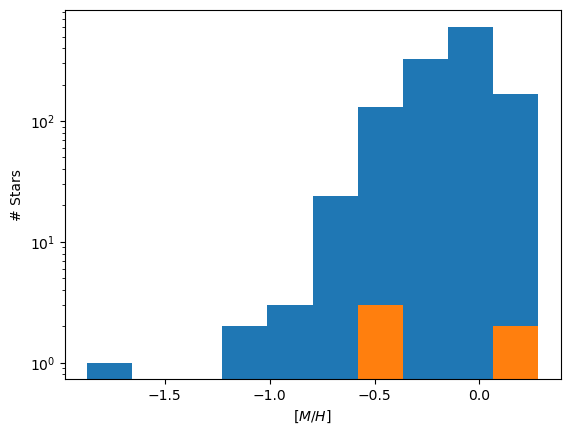

In [68]:
bins = plt.hist(table['M_H'])[1]
plt.hist(table['M_H'][wing_emission_spec_idx],bins)
plt.yscale('log')
plt.xlabel(r'$[M/H]$')
plt.ylabel('# Stars')

Text(0, 0.5, '# Stars')

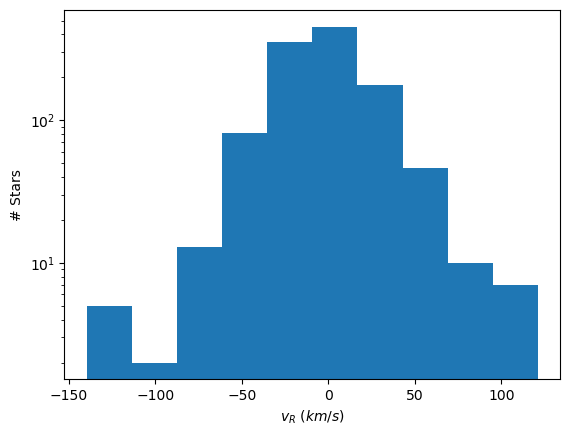

In [69]:
plt.hist(table['GAIAEDR3_DR2_RADIAL_VELOCITY'])
plt.yscale('log')
plt.xlabel(r'$v_R$ ($km/s$)')
plt.ylabel('# Stars')

(0.0, 1.0)

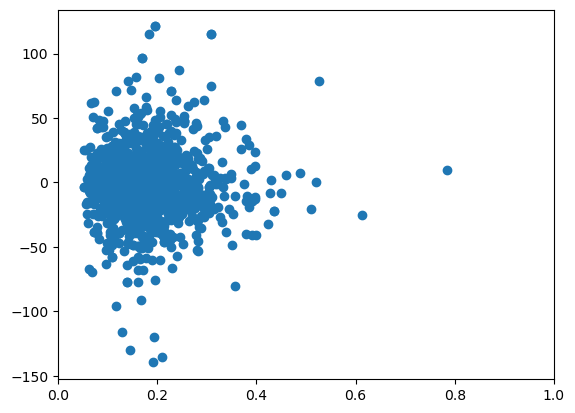

In [91]:
plt.scatter(1/table['GAIAEDR3_PARALLAX'], table['GAIAEDR3_DR2_RADIAL_VELOCITY'])
plt.xlim(0, 1)

In [57]:
np.argwhere(candidates[:,1] == 627)

array([[117],
       [118],
       [119],
       [120],
       [121],
       [122],
       [123],
       [124],
       [125],
       [126],
       [127]])